In [1]:
!pip install openpyxl
!pip install fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 48.8 MB/s eta 0:00:00


In [2]:
import fireducks.pandas as pd
from matplotlib import pyplot as plt
import os

In [3]:
import time
stime = time.time()

In [4]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-23 18:48:56--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [   <=>              ]  22.62M  2.83MB/s    in 12s     

2025-02-23 18:49:12 (1.94 MB/s) - ‘online+retail.zip’ saved [23715478]



In [5]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [6]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1 = pd.concat([df1]*60)
df1.shape

(32514540, 8)

In [7]:
df1.shape

(32514540, 8)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32514540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Description  object        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.2+ GB


#### DATA CLEANING : Handle any missing values if any

In [9]:
df1.isnull().sum()

InvoiceNo            0
StockCode            0
Description      87240
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID     8104800
Country              0
dtype: int64

In [10]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,None,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
df1[df1.StockCode == "22139"]  ##So for same stockcode with missing description we have other with description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,None,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,None,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [12]:
df1[df1.StockCode == "22139"].Description.mode()          #Using the most used value

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: object

In [13]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4787,DCGS0069,ebay,60
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,60
4789,DCGS0073,ebay,60
4790,gift_0001_20,to push order througha s stock was,60


In [14]:
most_freq[most_freq.StockCode == "85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120


In [15]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4785,DCGS0068,ebay,60
4786,DCGS0069,OOH LA LA DOGS COLLAR,60
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,60
4789,DCGS0073,ebay,60


In [16]:
most_freq.columns = ["StockCode", "freq_Description","count"]

df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940


In [17]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940


In [18]:
df2.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description            6720
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID          8104800
Country                   0
freq_Description       6720
count                  6720
dtype: int64

In [19]:
df2.dropna(subset = ["Description"],inplace=True)
df2.isnull().sum() ##Customer_ID won't affect much in our retail Process

InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID          8098080
Country                   0
freq_Description          0
count                     0
dtype: int64

In [20]:
df2.drop(columns=["freq_Description","count"],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df2.describe()   ##Handle -ve values

,Quantity,UnitPrice,CustomerID
count,3.250782e+07,3.250782e+07,2.440974e+07
mean,9.555919e+00,4.612067e+00,1.528769e+04
std,2.181032e+02,9.676974e+01,1.713598e+03
min,-8.099500e+04,-1.106206e+04,1.234600e+04
25%,1.000000e+00,1.250000e+00,1.395300e+04
50%,3.000000e+00,2.080000e+00,1.515200e+04
75%,1.000000e+01,4.130000e+00,1.679100e+04
max,8.099500e+04,3.897000e+04,1.828700e+04


In [22]:
df2[df2.Quantity<0]  #Quantity can't be -ve

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
32513080,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
32514172,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
32514346,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
32514347,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [23]:
df2[df2.UnitPrice<0]   #Unit Price can't be negetive

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
841892,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
841893,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
1383801,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
31188797,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
31730705,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
31730706,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
32272614,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [24]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,UnitPrice,CustomerID
count,3.180624e+07,3.180624e+07,2.387304e+07
mean,1.054204e+01,3.907625e+00,1.529442e+04
std,1.555240e+02,3.591565e+01,1.713139e+03
min,1.000000e+00,1.000000e-03,1.234600e+04
25%,1.000000e+00,1.250000e+00,1.396900e+04
50%,3.000000e+00,2.080000e+00,1.515900e+04
75%,1.000000e+01,4.130000e+00,1.679500e+04
max,8.099500e+04,1.354133e+04,1.828700e+04


In [25]:
df3.Quantity.quantile(0.9999)

1440.0

In [26]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
32410111,574294,21915,RED HARMONICA IN BOX,2100,2011-11-03 15:47:00,1.06,16333.0,United Kingdom
32419666,574941,22197,POPCORN HOLDER,1820,2011-11-07 17:42:00,1.95,NaN,United Kingdom
32463133,578060,M,Manual,1600,2011-11-22 15:22:00,0.25,17857.0,United Kingdom
32484052,579498,23084,RABBIT NIGHT LIGHT,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


Feature Engineering : Create New Columns

In [27]:
df4 = df3.copy()
df4['TotalSales'] = df4.Quantity * df4.UnitPrice
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


## Trend Analysis

In [28]:
df4['Month'] = df4["InvoiceDate"].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
24740992,567905,23147,SINGLE ANTIQUE ROSE HOOK IVORY,12,2011-09-22 16:37:00,1.45,12952.0,United Kingdom,17.40,9
19364285,571185,48187,DOORMAT NEW ENGLAND,4,2011-10-14 11:15:00,8.25,13047.0,United Kingdom,33.00,10
25014231,543546,22625,RED KITCHEN SCALES,1,2011-02-09 16:52:00,16.63,NaN,United Kingdom,16.63,2
11006044,551006,22378,WALL TIDY RETROSPOT,1,2011-04-26 09:48:00,4.96,NaN,United Kingdom,4.96,4
29772033,579285,21533,RETROSPOT LARGE MILK JUG,3,2011-11-29 10:56:00,4.95,14180.0,United Kingdom,14.85,11


## Visualization and EDA

1. Plot Monthly Sales


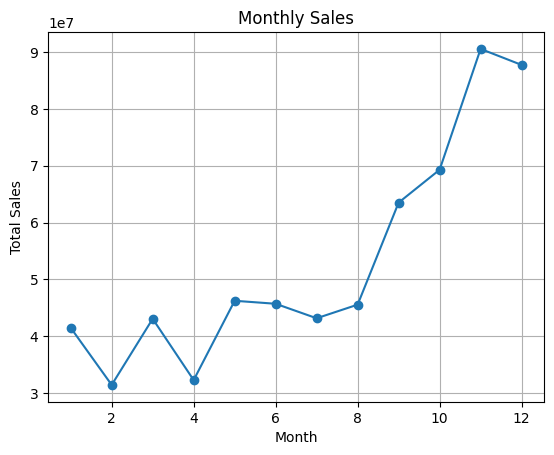

In [29]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()
monthly_sales.plot(kind="line" , title = "Monthly Sales", marker ="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()

**Insights**
Total Sales started rising up in August having a peek in November. Might be because of Holiday season in year end.

2. Top 5 Countries

In [30]:
# prompt: plot horizontal bar chart for top 5 countries by total sales

top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
top_5_countries

Country
United Kingdom    5.415133e+08
Netherlands       1.712678e+07
EIRE              1.700724e+07
Germany           1.373203e+07
France            1.258291e+07
Name: TotalSales, dtype: float64

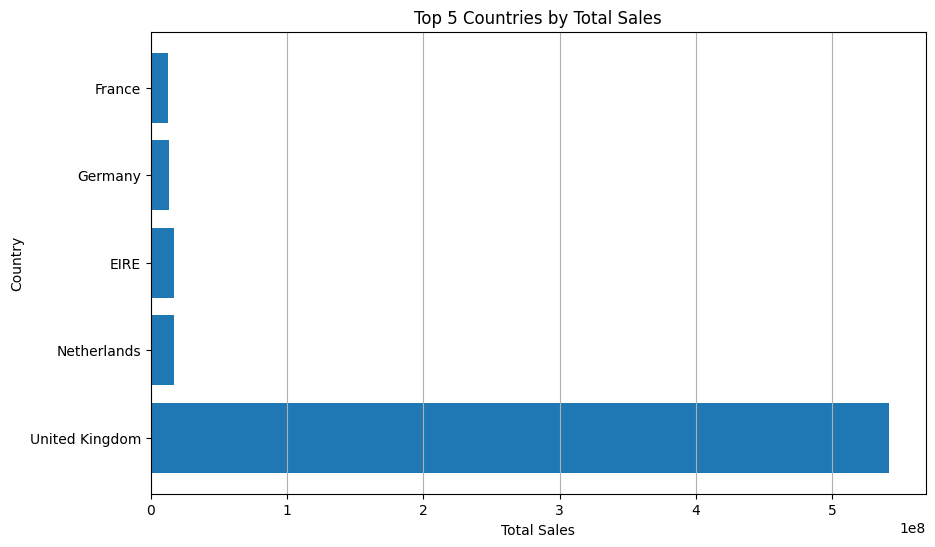

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()

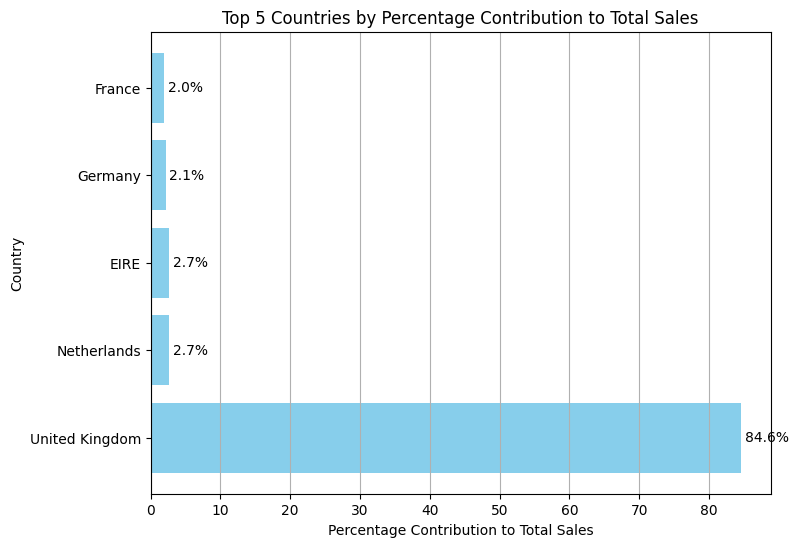

In [32]:
country_wise_sales = df4.groupby('Country')['TotalSales'].sum()

top_5_countries = country_wise_sales.nlargest(5)

total_sales = country_wise_sales.sum()
percentages = (top_5_countries / total_sales) * 100

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(top_5_countries.index, percentages, color='skyblue')
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

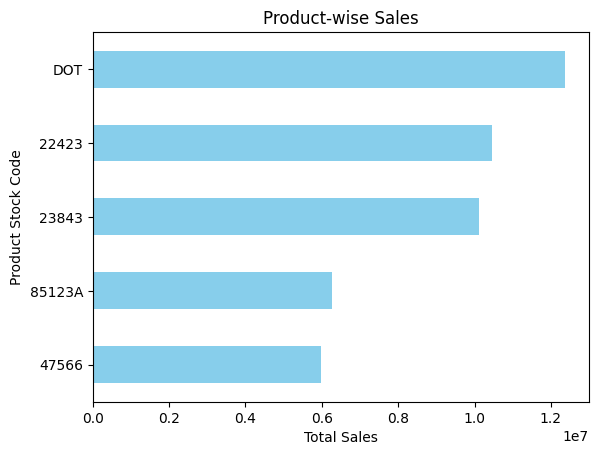

In [33]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()
top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.show()

In [34]:
product_wise_sales.sort_values(ascending=False)

StockCode
DOT       12374926.20
22423     10469084.40
23843     10108176.00
85123A     6271128.00
47566      5970259.80
             ...     
90084           51.00
21268           50.40
51014c          49.80
84227           25.20
PADS             0.18
Name: TotalSales, Length: 3922, dtype: float64

In [35]:
product_wise_sales.sum()

640001072.64

In [36]:
df4[df4.StockCode == 'DOT' ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
32509465,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
32509885,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
32511999,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
32513539,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [37]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


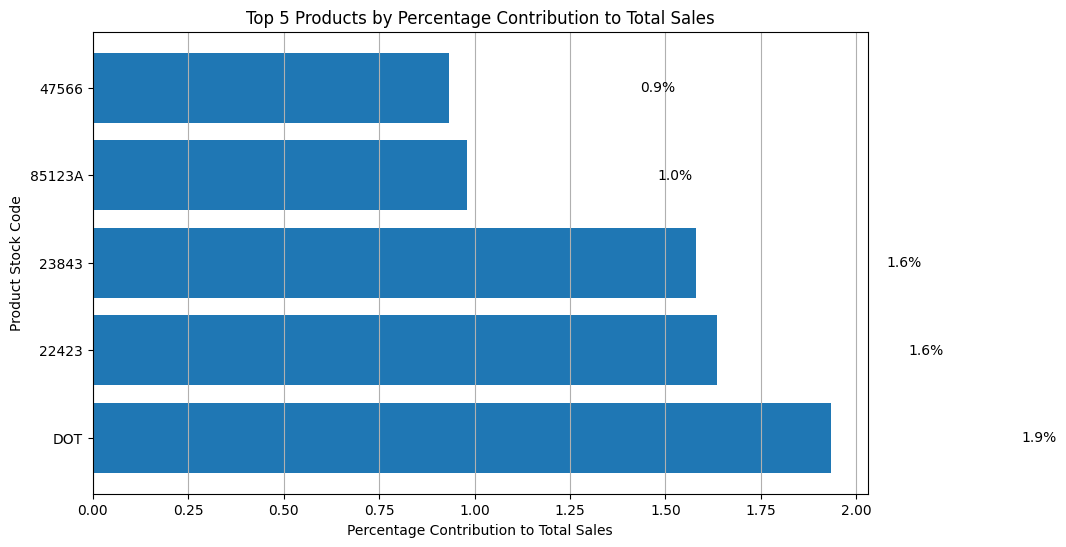

In [38]:
# Plot same chart as above for product sales but use percentage this time. Show % on the bar
# Assuming df4 is already created from the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

### 4. RFM Analysis

In [39]:
curr_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
curr_date

Timestamp('2011-12-10 12:50:00')

In [40]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (curr_date - x.max()).days,  #Recent value for each customer
    "InvoiceNo": "count",
    "TotalSales": "sum"
})

rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,60,4631016.0
12347.0,2,10920,258600.0
12348.0,75,1860,107834.4
12349.0,19,4380,105453.0
12350.0,310,1020,20064.0


In [41]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,60,4631016.0,1,1,4,6
12347.0,2,10920,258600.0,4,4,4,12
12348.0,75,1860,107834.4,2,2,4,8
12349.0,19,4380,105453.0,3,3,4,10
12350.0,310,1020,20064.0,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,600,10836.0,1,1,1,3
18281.0,181,420,4849.2,1,1,1,3
18282.0,8,720,10683.0,4,1,1,6


In [42]:
#Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12347.0,2,10920,258600.0,4,4,4,12
12362.0,3,15960,313573.8,4,4,4,12
12417.0,3,11520,218946.0,4,4,4,12
12423.0,1,7500,111558.6,4,4,4,12
12433.0,1,25200,802552.2,4,4,4,12
...,...,...,...,...,...,...,...
18224.0,264,600,9537.0,1,1,1,3
18227.0,218,300,5625.0,1,1,1,3
18269.0,366,420,10116.0,1,1,1,3


5. Customer Churn Analysis


In [43]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [44]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [45]:
type(customer_last_purchase)

fireducks.pandas.series.Series

In [46]:
curr_date

Timestamp('2011-12-10 12:50:00')

In [47]:
customer_last_purchase = (curr_date - customer_last_purchase).dt.days
customer_last_purchase.head()

CustomerID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
Name: InvoiceDate, dtype: int64

In [48]:
#Define Churn threshold (e.g. x days without purchase)

churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head()

CustomerID
12346.0    325
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 1449


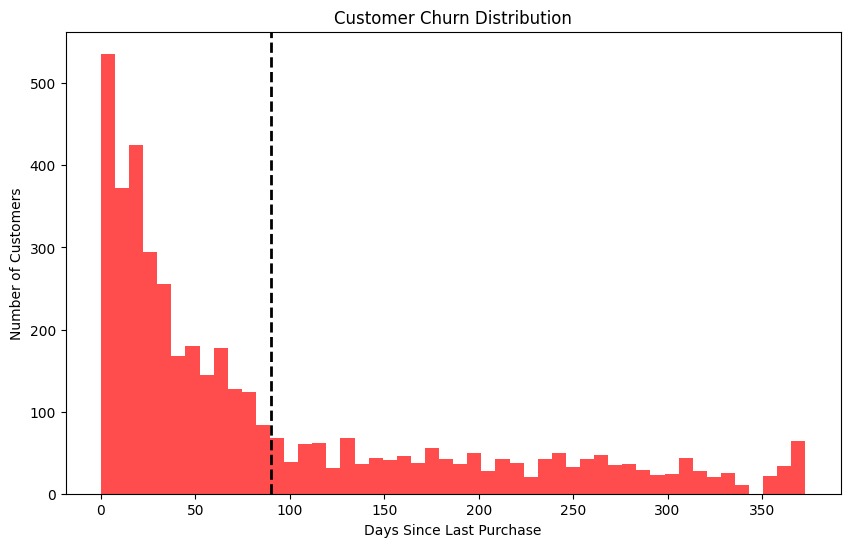

In [49]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [50]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")

[fireducks.pandas] total time taken: 101.29754710197449 sec
